In [1]:
'''
Title: Gross Income Correlations in MCU/DC Movies
Author: Aron Kim
Date: 11/22/24

This project aims to find correlations to the box office gross income within US/Canada and also outside of US/Canada.
The whole process will be shown including finding missing data, data cleaning, and the process of finding correlation.
I will be using pandas, seaborn, numpy, and matplotlib.
My hypothesis for correlations with gross income within US/Canada will be connected to higher budgets, release date, and the rotten tomatoes critic score.
My hypothesis for correlations with gross income outside of US/Canada will be connected to higher budgets and the rotten tomatoes critic score.

'''

In [157]:
## Starting by importing necessary packages for the project

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


## Reading in the data that will be used for this project

df = pd.read_csv(r'C:\Users\aronk\OneDrive\Desktop\PythonMovieCorrelation\MCUDCcorrelation.csv')

In [158]:
## Looking at the data to see what we're working with

df.head()

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even
0,Superman,15/12/1978,"$134,478,449","$166,000,000","$300,478,449","$55,000,000",False,NaN,Warner Bros.,PG,...,Superman,45%,5.46,94.0,Male,1978.0,"$1,404,237,104","$257,033,544","$137,500,000",Success
1,Superman II,19/06/1981,"$108,185,706","$108,200,000","$216,385,706","$54,000,000",False,NaN,Warner Bros.,PG,...,Superman,50%,4.01,83.0,Male,1981.0,"$725,336,273","$181,010,842","$135,000,000",Success
2,Superman III,17/06/1983,"$59,950,623","$20,300,000","$80,250,623","$39,000,000",False,NaN,Warner Bros.,PG,...,Superman,75%,2.06,29.0,Male,1983.0,"$245,506,947","$119,310,861","$97,500,000",Flop
3,Supergirl,21/11/1984,"$14,296,438",NaN,"$14,296,438","$35,000,000",False,NaN,Tri-Star Pictures,PG,...,Superman,100%,0.41,8.0,Female,1984.0,"$41,926,345","$102,642,497","$87,500,000",Flop
4,Howard the Duck,01/08/1986,"$16,295,774","$21,667,000","$37,962,774","$37,000,000",False,NaN,Universal Pictures,PG,...,Howard the Duck,43%,1.03,13.0,Male,1986.0,"$37,962,774","$37,000,000","$92,500,000",Flop


In [159]:
## Looking for null values within the data

for col in df.columns:
    isnull = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, isnull))

# There are some null values but it is insignificant because the values are close to zero

Film - 0.008771929824561403%
U.S. release date - 0.008771929824561403%
Box office gross Domestic (U.S. and Canada ) - 0.008771929824561403%
Box office gross Other territories - 0.017543859649122806%
Box office gross Worldwide - 0.008771929824561403%
Budget - 0.008771929824561403%
MCU - 0.008771929824561403%
Phase - 0.7105263157894737%
Distributor - 0.008771929824561403%
MPAA Rating - 0.008771929824561403%
Length - 0.008771929824561403%
Minutes - 0.008771929824561403%
Franchise - 0.008771929824561403%
Character Family - 0.008771929824561403%
Domestic % - 0.008771929824561403%
Gross to Budget - 0.008771929824561403%
Rotten Tomatoes Critic Score - 0.008771929824561403%
Male/Female-led - 0.008771929824561403%
Year - 0.008771929824561403%
Inflation Adjusted Worldwide Gross - 0.008771929824561403%
Inflation Adjusted Budget - 0.008771929824561403%
2.5x prod - 0.008771929824561403%
Break Even - 0.008771929824561403%


In [160]:
## Looking at the data types for each of the columns

df.dtypes

Film                                             object
U.S. release date                                object
Box office gross Domestic (U.S. and Canada )     object
Box office gross Other territories               object
Box office gross Worldwide                       object
Budget                                           object
MCU                                              object
Phase                                           float64
Distributor                                      object
MPAA Rating                                      object
Length                                           object
Minutes                                         float64
Franchise                                        object
Character Family                                 object
Domestic %                                       object
Gross to Budget                                 float64
Rotten Tomatoes Critic Score                    float64
Male/Female-led                                 

In [161]:
## Begin data cleaning


# Changing data type of column "year" from float to int to make data easier to look at

df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)

In [162]:
# Making sure every row in the column MCU that says "False" has the value "NaN" in the column Phase, and is not null.

df['New_Column'] = (df['MCU'] == False) & (df['Phase'] != ('NaN')) & (df['Phase'].notna())
print(df[['MCU', 'Phase', 'New_Column']])

       MCU  Phase  New_Column
0    False    NaN       False
1    False    NaN       False
2    False    NaN       False
3    False    NaN       False
4    False    NaN       False
..     ...    ...         ...
109  False    NaN       False
110   True    5.0       False
111  False    NaN       False
112  False    NaN       False
113    NaN    NaN       False

[114 rows x 3 columns]


In [163]:
# There are two columns for release date of the movie so I am adding a new column with the correct year

df['Correct_Year'] = df['U.S. release date'].astype(str).str[-4:]
df['Correct_Year']


0      1978
1      1981
2      1983
3      1984
4      1986
       ... 
109    2023
110    2023
111    2023
112    2024
113     nan
Name: Correct_Year, Length: 114, dtype: object

In [164]:
# Changing name of column to call it easier

df = df.rename(columns={'Box office gross Domestic (U.S. and Canada )' : 'Gross_US'})
df = df.rename(columns={'Box office gross Other territories' : 'Gross_Outside'})
df

,Film,U.S. release date,Gross_US,Gross_Outside,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even,New_Column,Correct_Year
0,Superman,15/12/1978,"$134,478,449","$166,000,000","$300,478,449","$55,000,000",False,NaN,Warner Bros.,PG,...,5.46,94.0,Male,1978,"$1,404,237,104","$257,033,544","$137,500,000",Success,False,1978
1,Superman II,19/06/1981,"$108,185,706","$108,200,000","$216,385,706","$54,000,000",False,NaN,Warner Bros.,PG,...,4.01,83.0,Male,1981,"$725,336,273","$181,010,842","$135,000,000",Success,False,1981
2,Superman III,17/06/1983,"$59,950,623","$20,300,000","$80,250,623","$39,000,000",False,NaN,Warner Bros.,PG,...,2.06,29.0,Male,1983,"$245,506,947","$119,310,861","$97,500,000",Flop,False,1983
3,Supergirl,21/11/1984,"$14,296,438",NaN,"$14,296,438","$35,000,000",False,NaN,Tri-Star Pictures,PG,...,0.41,8.0,Female,1984,"$41,926,345","$102,642,497","$87,500,000",Flop,False,1984
4,Howard the Duck,01/08/1986,"$16,295,774","$21,667,000","$37,962,774","$37,000,000",False,NaN,Universal Pictures,PG,...,1.03,13.0,Male,1986,"$37,962,774","$37,000,000","$92,500,000",Flop,False,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Blue Beetle,18/08/2023,"$72,488,072","$56,800,000","$129,288,072","$120,000,000",False,NaN,Warner Bros.,PG-13,...,1.08,78.0,Male,2023,"$129,288,072","$120,000,000","$300,000,000",Flop,False,2023
110,The Marvels,10/11/2023,"$84,500,223","$121,373,601","$205,873,824","$219,800,000",True,5.0,Walt Disney Studios Motion Pictures,PG-13,...,0.94,62.0,Female,2023,"$205,873,824","$219,800,000","$549,500,000",Flop,False,2023
111,Aquaman and the Lost Kingdom,20/12/2023,"$124,436,589","$309,900,000","$434,336,589","$205,000,000",False,NaN,Warner Bros.,PG-13,...,2.12,35.0,Male,2023,"$434,336,589","$205,000,000","$512,500,000",Flop,False,2023
112,Madame Web,14/02/2024,"$42,619,699","$54,000,000","$96,619,699","$80,000,000",False,NaN,Columbia Pictures,PG-13,...,1.21,13.0,Female,2024,"$96,619,699","$80,000,000","$200,000,000",Flop,False,2024


In [165]:
# Ordering data by gross revenue from highest to lowest
df.sort_values(by=['Gross_US'], ascending=False, na_position='first')
df.sort_values(by=['Gross_Outside'], ascending=False, na_position='first')
df

,Film,U.S. release date,Gross_US,Gross_Outside,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even,New_Column,Correct_Year
0,Superman,15/12/1978,"$134,478,449","$166,000,000","$300,478,449","$55,000,000",False,NaN,Warner Bros.,PG,...,5.46,94.0,Male,1978,"$1,404,237,104","$257,033,544","$137,500,000",Success,False,1978
1,Superman II,19/06/1981,"$108,185,706","$108,200,000","$216,385,706","$54,000,000",False,NaN,Warner Bros.,PG,...,4.01,83.0,Male,1981,"$725,336,273","$181,010,842","$135,000,000",Success,False,1981
2,Superman III,17/06/1983,"$59,950,623","$20,300,000","$80,250,623","$39,000,000",False,NaN,Warner Bros.,PG,...,2.06,29.0,Male,1983,"$245,506,947","$119,310,861","$97,500,000",Flop,False,1983
3,Supergirl,21/11/1984,"$14,296,438",NaN,"$14,296,438","$35,000,000",False,NaN,Tri-Star Pictures,PG,...,0.41,8.0,Female,1984,"$41,926,345","$102,642,497","$87,500,000",Flop,False,1984
4,Howard the Duck,01/08/1986,"$16,295,774","$21,667,000","$37,962,774","$37,000,000",False,NaN,Universal Pictures,PG,...,1.03,13.0,Male,1986,"$37,962,774","$37,000,000","$92,500,000",Flop,False,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Blue Beetle,18/08/2023,"$72,488,072","$56,800,000","$129,288,072","$120,000,000",False,NaN,Warner Bros.,PG-13,...,1.08,78.0,Male,2023,"$129,288,072","$120,000,000","$300,000,000",Flop,False,2023
110,The Marvels,10/11/2023,"$84,500,223","$121,373,601","$205,873,824","$219,800,000",True,5.0,Walt Disney Studios Motion Pictures,PG-13,...,0.94,62.0,Female,2023,"$205,873,824","$219,800,000","$549,500,000",Flop,False,2023
111,Aquaman and the Lost Kingdom,20/12/2023,"$124,436,589","$309,900,000","$434,336,589","$205,000,000",False,NaN,Warner Bros.,PG-13,...,2.12,35.0,Male,2023,"$434,336,589","$205,000,000","$512,500,000",Flop,False,2023
112,Madame Web,14/02/2024,"$42,619,699","$54,000,000","$96,619,699","$80,000,000",False,NaN,Columbia Pictures,PG-13,...,1.21,13.0,Female,2024,"$96,619,699","$80,000,000","$200,000,000",Flop,False,2024


In [166]:
# Data is not in order, checking to see if it is because of the null values

df[['Gross_US', 'Gross_Outside']].isna().sum()

Gross_US         1
Gross_Outside    2
dtype: int64

In [170]:
# The gross income columns are objects that have the sign "$" and "," which is preventing me from switching the type to an integer
# They also has null values which prevent me from switching the type as well
# These codes remove those values and give me the numerical values that I need. They also change the null values to 0 as well

df['Gross_US'] = df['Gross_US'].replace({'$': '', ',':''}, regex=True).fillna(0).astype(int)
df['Gross_Outside'] = df['Gross_Outside'].replace({'$': '', ',': ''}, regex=True).fillna(0).astype(int)
df.dtypes

Film                                   object
U.S. release date                      object
Gross_US                                int32
Gross_Outside                           int32
Box office gross Worldwide             object
Budget                                 object
MCU                                    object
Phase                                 float64
Distributor                            object
MPAA Rating                            object
Length                                 object
Minutes                               float64
Franchise                              object
Character Family                       object
Domestic %                             object
Gross to Budget                       float64
Rotten Tomatoes Critic Score          float64
Male/Female-led                        object
Year                                    int32
Inflation Adjusted Worldwide Gross     object
Inflation Adjusted Budget              object
2.5x prod                         

In [171]:
# Ordering data by US/Canada gross revenue from highest to lowest

df.sort_values(by=['Gross_US'], ascending=False, inplace=True)
df

,Film,U.S. release date,Gross_US,Gross_Outside,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even,New_Column,Correct_Year
84,Avengers: Endgame,26/04/2019,858373000,1941066100,"$2,799,439,100","$356,000,000",True,3.0,Walt Disney Studios Motion Pictures,PG-13,...,7.86,94.0,Male,2019,"$2,799,439,100","$356,000,000","$890,000,000",Success,False,2019
96,Spider-Man: No Way Home,17/12/2021,814115070,1107732041,"$1,921,847,111","$200,000,000",True,4.0,Sony Pictures Entertainment,PG-13,...,9.61,93.0,Male,2021,"$1,921,847,111","$200,000,000","$500,000,000",Success,False,2021
74,Black Panther,16/02/2018,700426566,649499517,"$1,349,926,083","$200,000,000",True,3.0,Walt Disney Studios Motion Pictures,PG-13,...,6.75,96.0,Male,2018,"$1,349,926,083","$200,000,000","$500,000,000",Success,False,2018
75,Avengers: Infinity War,27/04/2018,678815482,1373599557,"$2,052,415,039","$325,000,000",True,3.0,Walt Disney Studios Motion Pictures,PG-13,...,6.32,85.0,Male,2018,"$2,052,415,039","$325,000,000","$812,500,000",Success,False,2018
47,The Avengers,04/05/2012,623357910,895455078,"$1,518,812,988","$220,000,000",True,1.0,Walt Disney Studios Motion Pictures,PG-13,...,6.90,91.0,Male,2012,"$1,518,812,988","$220,000,000","$550,000,000",Success,False,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,Batman: Mask of the Phantasm,25/12/1993,5635204,213000,"$5,848,204","$5,600,000",False,NaN,Warner Bros.,PG,...,1.04,82.0,Male,1993,"$12,331,882","$11,808,504","$14,000,000",Flop,False,1993
13,Steel,15/08/1997,1710972,91000,"$1,801,972","$16,000,000",False,NaN,Warner Bros.,PG-13,...,0.11,12.0,Male,1997,"$3,420,958","$30,375,236","$40,000,000",Flop,False,1997
6,The Return of Swamp Thing,12/05/1989,192816,82112,"$274,928","$3,000,000",False,NaN,Millimeter Films,PG-13,...,0.09,44.0,Male,1989,"$675,573","$7,371,813","$7,500,000",Flop,False,1989
8,The Punisher,05/10/1989,0,30000000,"$30,000,000","$9,000,000",False,NaN,New World International,R,...,3.33,25.0,Male,1989,"$30,000,000","$9,000,000","$22,500,000",Success,False,1989


In [172]:
# Ordering data by gross revenue of countries other than US/Canada from highest to lowest

df.sort_values(by=['Gross_Outside'], ascending=False, inplace=True)
df

,Film,U.S. release date,Gross_US,Gross_Outside,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even,New_Column,Correct_Year
84,Avengers: Endgame,26/04/2019,858373000,1941066100,"$2,799,439,100","$356,000,000",True,3.0,Walt Disney Studios Motion Pictures,PG-13,...,7.86,94.0,Male,2019,"$2,799,439,100","$356,000,000","$890,000,000",Success,False,2019
75,Avengers: Infinity War,27/04/2018,678815482,1373599557,"$2,052,415,039","$325,000,000",True,3.0,Walt Disney Studios Motion Pictures,PG-13,...,6.32,85.0,Male,2018,"$2,052,415,039","$325,000,000","$812,500,000",Success,False,2018
96,Spider-Man: No Way Home,17/12/2021,814115070,1107732041,"$1,921,847,111","$200,000,000",True,4.0,Sony Pictures Entertainment,PG-13,...,9.61,93.0,Male,2021,"$1,921,847,111","$200,000,000","$500,000,000",Success,False,2021
58,Avengers: Age of Ultron,01/05/2015,459005868,946012180,"$1,405,018,048","$250,000,000",True,2.0,Walt Disney Studios Motion Pictures,PG-13,...,5.62,76.0,Male,2015,"$1,405,018,048","$250,000,000","$625,000,000",Success,False,2015
47,The Avengers,04/05/2012,623357910,895455078,"$1,518,812,988","$220,000,000",True,1.0,Walt Disney Studios Motion Pictures,PG-13,...,6.90,91.0,Male,2012,"$1,518,812,988","$220,000,000","$550,000,000",Success,False,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,Batman: Mask of the Phantasm,25/12/1993,5635204,213000,"$5,848,204","$5,600,000",False,NaN,Warner Bros.,PG,...,1.04,82.0,Male,1993,"$12,331,882","$11,808,504","$14,000,000",Flop,False,1993
13,Steel,15/08/1997,1710972,91000,"$1,801,972","$16,000,000",False,NaN,Warner Bros.,PG-13,...,0.11,12.0,Male,1997,"$3,420,958","$30,375,236","$40,000,000",Flop,False,1997
6,The Return of Swamp Thing,12/05/1989,192816,82112,"$274,928","$3,000,000",False,NaN,Millimeter Films,PG-13,...,0.09,44.0,Male,1989,"$675,573","$7,371,813","$7,500,000",Flop,False,1989
3,Supergirl,21/11/1984,14296438,0,"$14,296,438","$35,000,000",False,NaN,Tri-Star Pictures,PG,...,0.41,8.0,Female,1984,"$41,926,345","$102,642,497","$87,500,000",Flop,False,1984


In [ ]:
## Beginning testing for correlations related to gross revenue

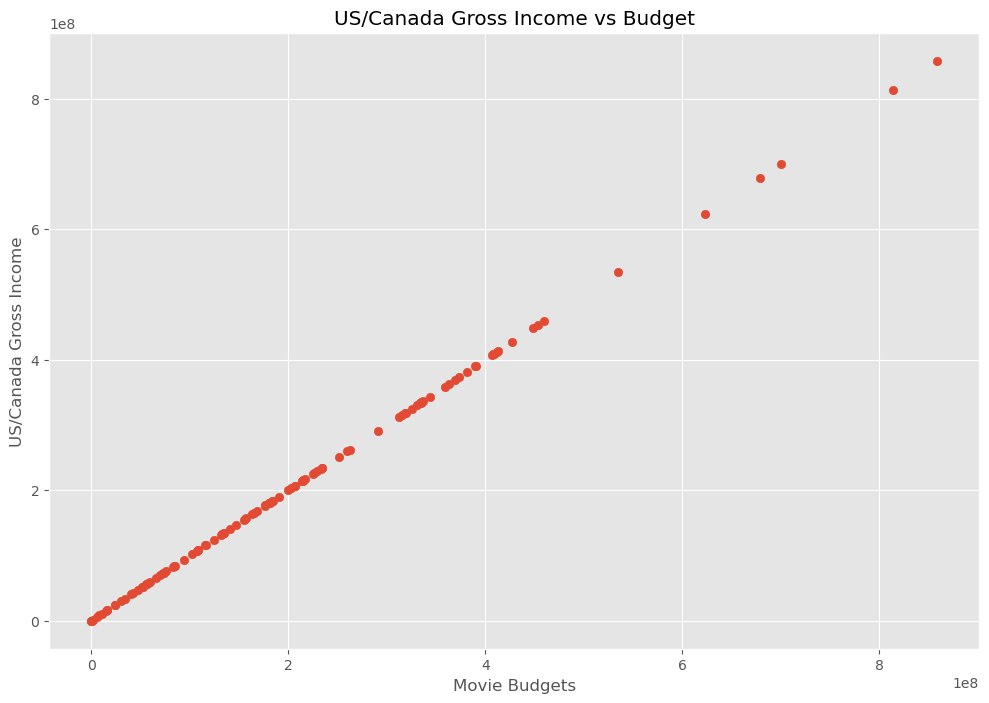

In [177]:
# Using scatter plot to compare US/Canada gross income vs budget
# Changed Budget column into an int so that I am able to add it to the scatter plot
# Scatter plot shows high correlation between US/Canada gross income and budget

df['Budget'] = df['Gross_US'].replace({'$': '', ',':''}, regex=True).fillna(0).astype(int)
plt.scatter(x=df['Budget'], y=df['Gross_US'])

plt.title('US/Canada Gross Income vs Budget')
plt.xlabel('Movie Budgets')
plt.ylabel('US/Canada Gross Income')
plt.show()

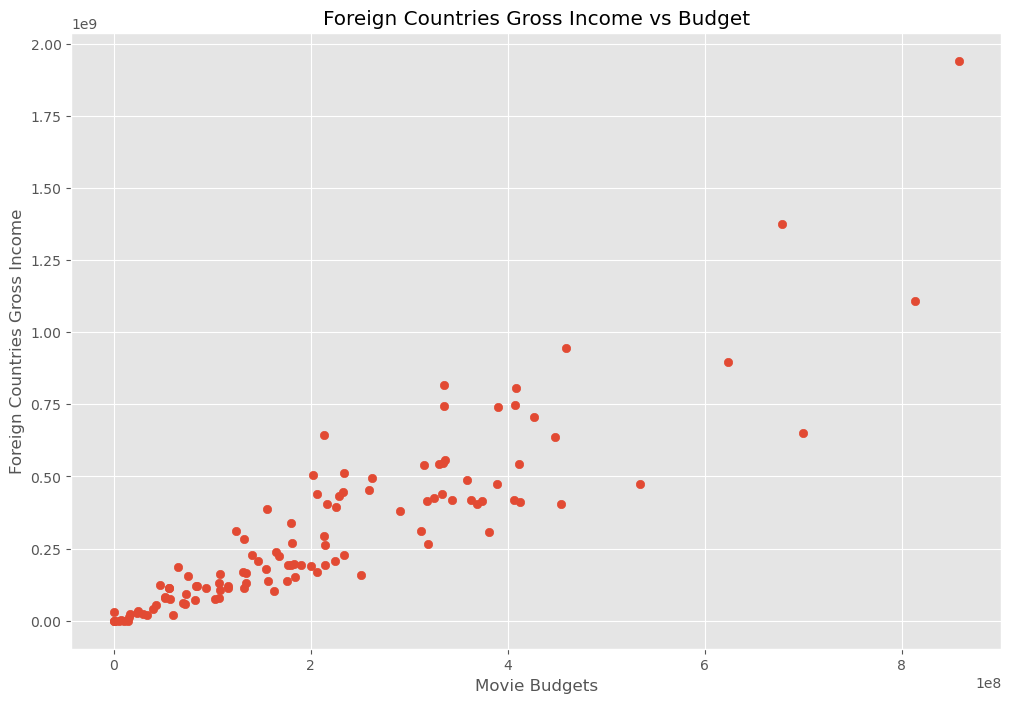

In [176]:
# Using scatter plot to compare countries aside from US/Canada gross income vs budget
# Scatter plot shows positive correlation between US/Canada gross income and budget

plt.scatter(x=df['Budget'], y=df['Gross_Outside'])

plt.title('Foreign Countries Gross Income vs Budget')
plt.xlabel('Movie Budgets')
plt.ylabel('Foreign Countries Gross Income')
plt.show()

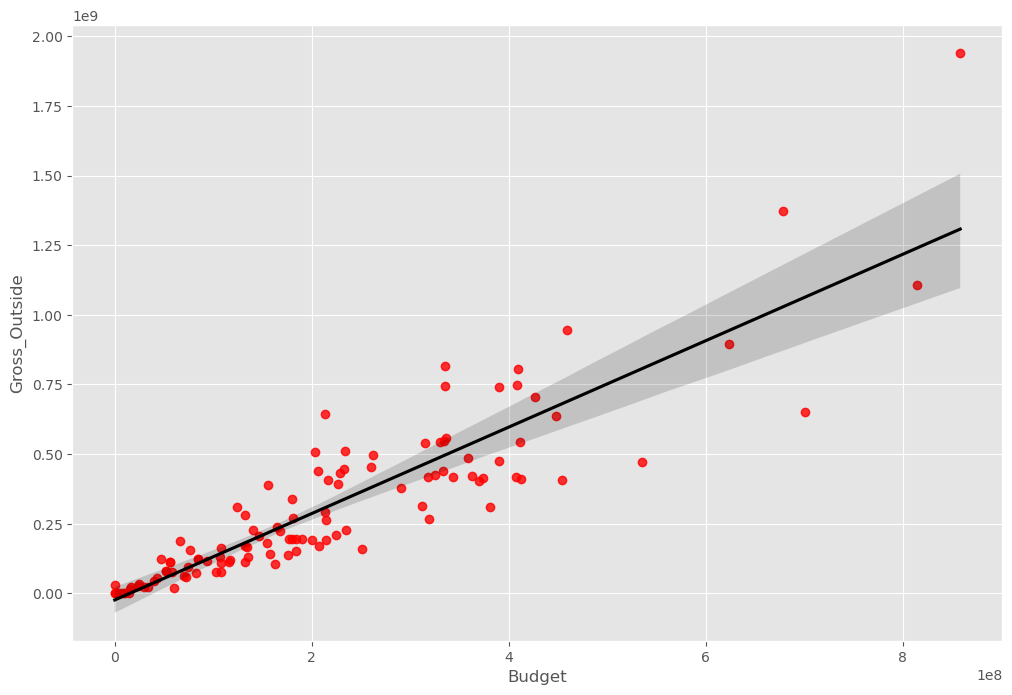

In [178]:
# Foreign Countries Gross Income vs Budget shows positive correlation but will use seaborn for regression plot to see date more accurately
# US/Canada Gross Income vs Budget shows high correlation so will not check with regression plot

sns.regplot(x='Budget', y='Gross_Outside', data=df, scatter_kws={"color": "red"}, line_kws={"color":"black"})
plt.show()            

In [ ]:
# My hypothesis that there is a correlation between gross income and budget has been proven


# For the other columns I will check the correlation with gross income using a for loop
# I will begin with US/Canada gross income and then gross income of countries outside of US/Canada

In [179]:
# I am using a for loop to change the column types that are objects into floats
# I need to change them to numerical values so that I can put them on a correlation heatmap

df_num = df
for col_name in df_num.columns:
    if df_num[col_name].dtype == 'object':
        df_num[col_name] = df_num[col_name].fillna('Unknown')
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes
df_num

,Film,U.S. release date,Gross_US,Gross_Outside,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even,New_Column,Correct_Year
84,6,102,858373000,1941066100,29,858373000,1,3.0,12,1,...,7.86,94.0,2,2019,32,57,57,1,False,30
75,7,105,678815482,1373599557,28,678815482,1,3.0,12,1,...,6.32,85.0,2,2018,31,53,54,1,False,29
96,70,77,814115070,1107732041,12,814115070,1,4.0,7,1,...,9.61,93.0,2,2021,15,30,39,1,False,32
58,5,3,459005868,946012180,9,459005868,1,2.0,12,1,...,5.62,76.0,2,2015,11,44,48,1,False,26
47,82,21,623357910,895455078,10,623357910,1,1.0,12,1,...,6.90,91.0,2,2012,14,36,43,1,False,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,14,100,5635204,213000,72,5635204,0,NaN,13,0,...,1.04,82.0,2,1993,17,2,5,0,False,8
13,71,63,1710972,91000,11,1710972,0,NaN,13,1,...,0.11,12.0,2,1997,44,51,29,0,False,10
6,92,53,192816,82112,43,192816,0,NaN,3,1,...,0.09,44.0,2,1989,85,71,51,0,False,6
3,73,91,14296438,0,20,14296438,0,NaN,8,0,...,0.41,8.0,1,1984,60,1,56,0,False,3


In [180]:
df

,Film,U.S. release date,Gross_US,Gross_Outside,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even,New_Column,Correct_Year
84,6,102,858373000,1941066100,29,858373000,1,3.0,12,1,...,7.86,94.0,2,2019,32,57,57,1,False,30
75,7,105,678815482,1373599557,28,678815482,1,3.0,12,1,...,6.32,85.0,2,2018,31,53,54,1,False,29
96,70,77,814115070,1107732041,12,814115070,1,4.0,7,1,...,9.61,93.0,2,2021,15,30,39,1,False,32
58,5,3,459005868,946012180,9,459005868,1,2.0,12,1,...,5.62,76.0,2,2015,11,44,48,1,False,26
47,82,21,623357910,895455078,10,623357910,1,1.0,12,1,...,6.90,91.0,2,2012,14,36,43,1,False,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,14,100,5635204,213000,72,5635204,0,NaN,13,0,...,1.04,82.0,2,1993,17,2,5,0,False,8
13,71,63,1710972,91000,11,1710972,0,NaN,13,1,...,0.11,12.0,2,1997,44,51,29,0,False,10
6,92,53,192816,82112,43,192816,0,NaN,3,1,...,0.09,44.0,2,1989,85,71,51,0,False,6
3,73,91,14296438,0,20,14296438,0,NaN,8,0,...,0.41,8.0,1,1984,60,1,56,0,False,3


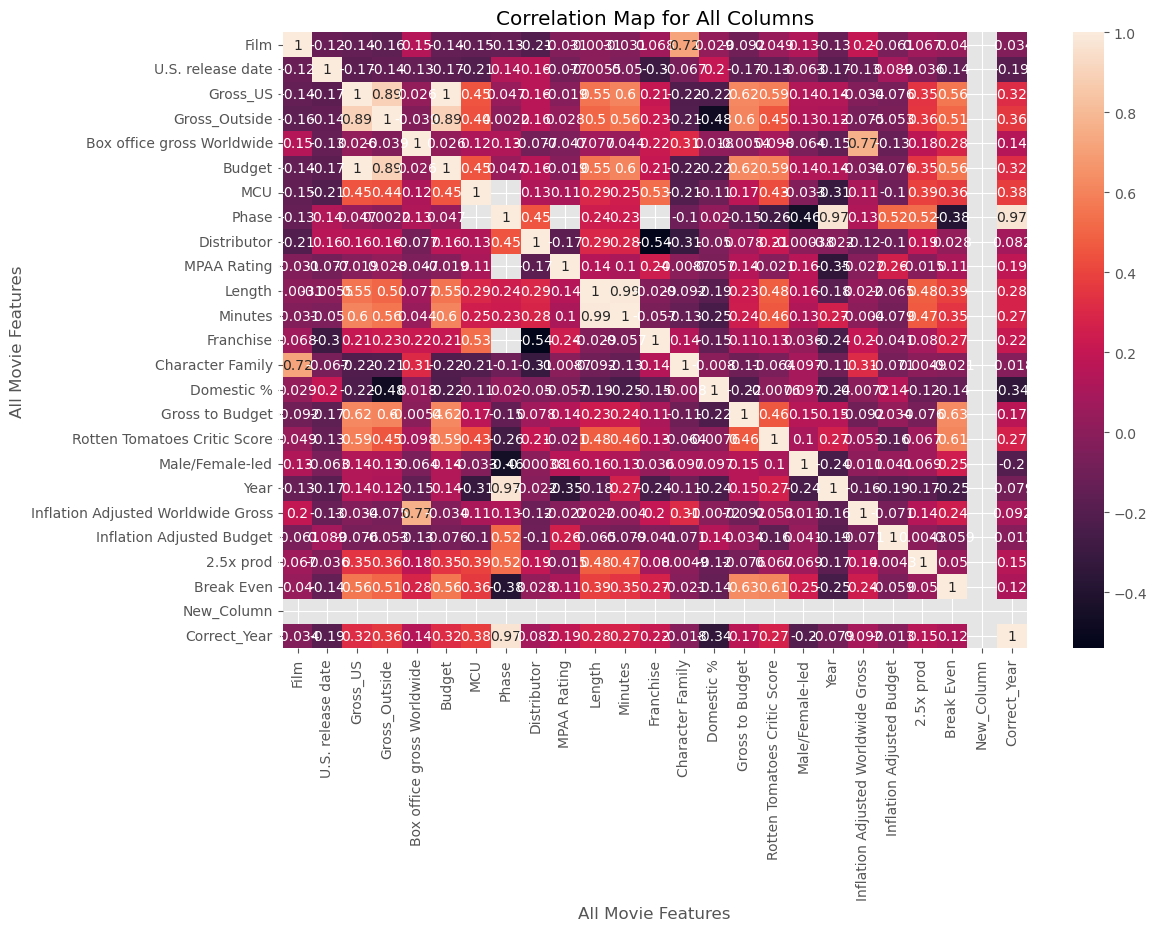

In [181]:
# Creating a heatmap to visually see what columns/features are most correlated with Gross income of US/Canada and Outside of US/Canada

correlation_map = df.corr(method='pearson')

sns.heatmap(correlation_map, annot=True)

plt.title('Correlation Map for All Columns')

plt.xlabel('All Movie Features')

plt.ylabel('All Movie Features')

plt.show()

In [186]:
# Bigger numbers are overlapping each other on the heatmap so I am creating a list of all correlations higher than 50%
#

corr_list = df_num.corr()
corr_comparison = corr_list.unstack()
sorted_comparison = corr_comparison.sort_values()
higher_corr = sorted_comparison[(sorted_comparison) > 0.5]
pd.set_option('display.max_rows', None)           # <----------- This code shows all the results instead of just the first five and last five

higher_corr

Length                              Gross_Outside                         0.502430
Gross_Outside                       Length                                0.502430
Break Even                          Gross_Outside                         0.507089
Gross_Outside                       Break Even                            0.507089
Inflation Adjusted Budget           Phase                                 0.517593
Phase                               Inflation Adjusted Budget             0.517593
                                    2.5x prod                             0.524936
2.5x prod                           Phase                                 0.524936
MCU                                 Franchise                             0.527038
Franchise                           MCU                                   0.527038
Gross_US                            Length                                0.550807
Length                              Gross_US                              0.550807
Budg

In [ ]:
## Final Results

# This list shows that US/Canada gross income is highly correlated to gross_outside, gross to budget, minutes, length, and rotten tomatoes critics score 
# This list shows that gross income outside of US/Canada is highly correlated to budget, gross_US, gross to budget, minutes, and length

# My hypothesis is proven to be incorrect
# I thought that higher budgets, release date, and rotten tomatoes critics score would be the only high correlations for gross income in US/Canada
# I failed to think of factors such as the length/minutes of the video
# My hypothesis for foreign countries was budget and rotten tomatoes critic score
# However it was more closely related to the length/minutes of the movies instead of the rotten tomatoes critic score